### Load dataset and base packages

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
df = pd.read_csv("creditcard.csv")

### Exploring the dataset

In [4]:
# Getting first five rows
# V1 ... V28 - PCA transformed variables
# Class - Target variable
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
# We will use a sample fraction of the dataset 
df = df.sample(frac = 0.1, random_state = 22)
df.shape

(28481, 31)

In [7]:
# Check NaN values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 13443 to 166609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float6

In [9]:
# 41 fraudulent data
# 28440 normal data
df["Class"].value_counts()

0    28440
1       41
Name: Class, dtype: int64

In [10]:
# Determine number of fraud cases in dataset
fraud = df[df["Class"] == 1]
normal = df[df["Class"]== 0]

In [11]:
len(fraud)

41

In [12]:
len(normal)

28440

In [13]:
# %0.14 fraudulent data
len(fraud)/(len(normal) + len(fraud))

0.001439556195358309

### Exploratory Data Analysis

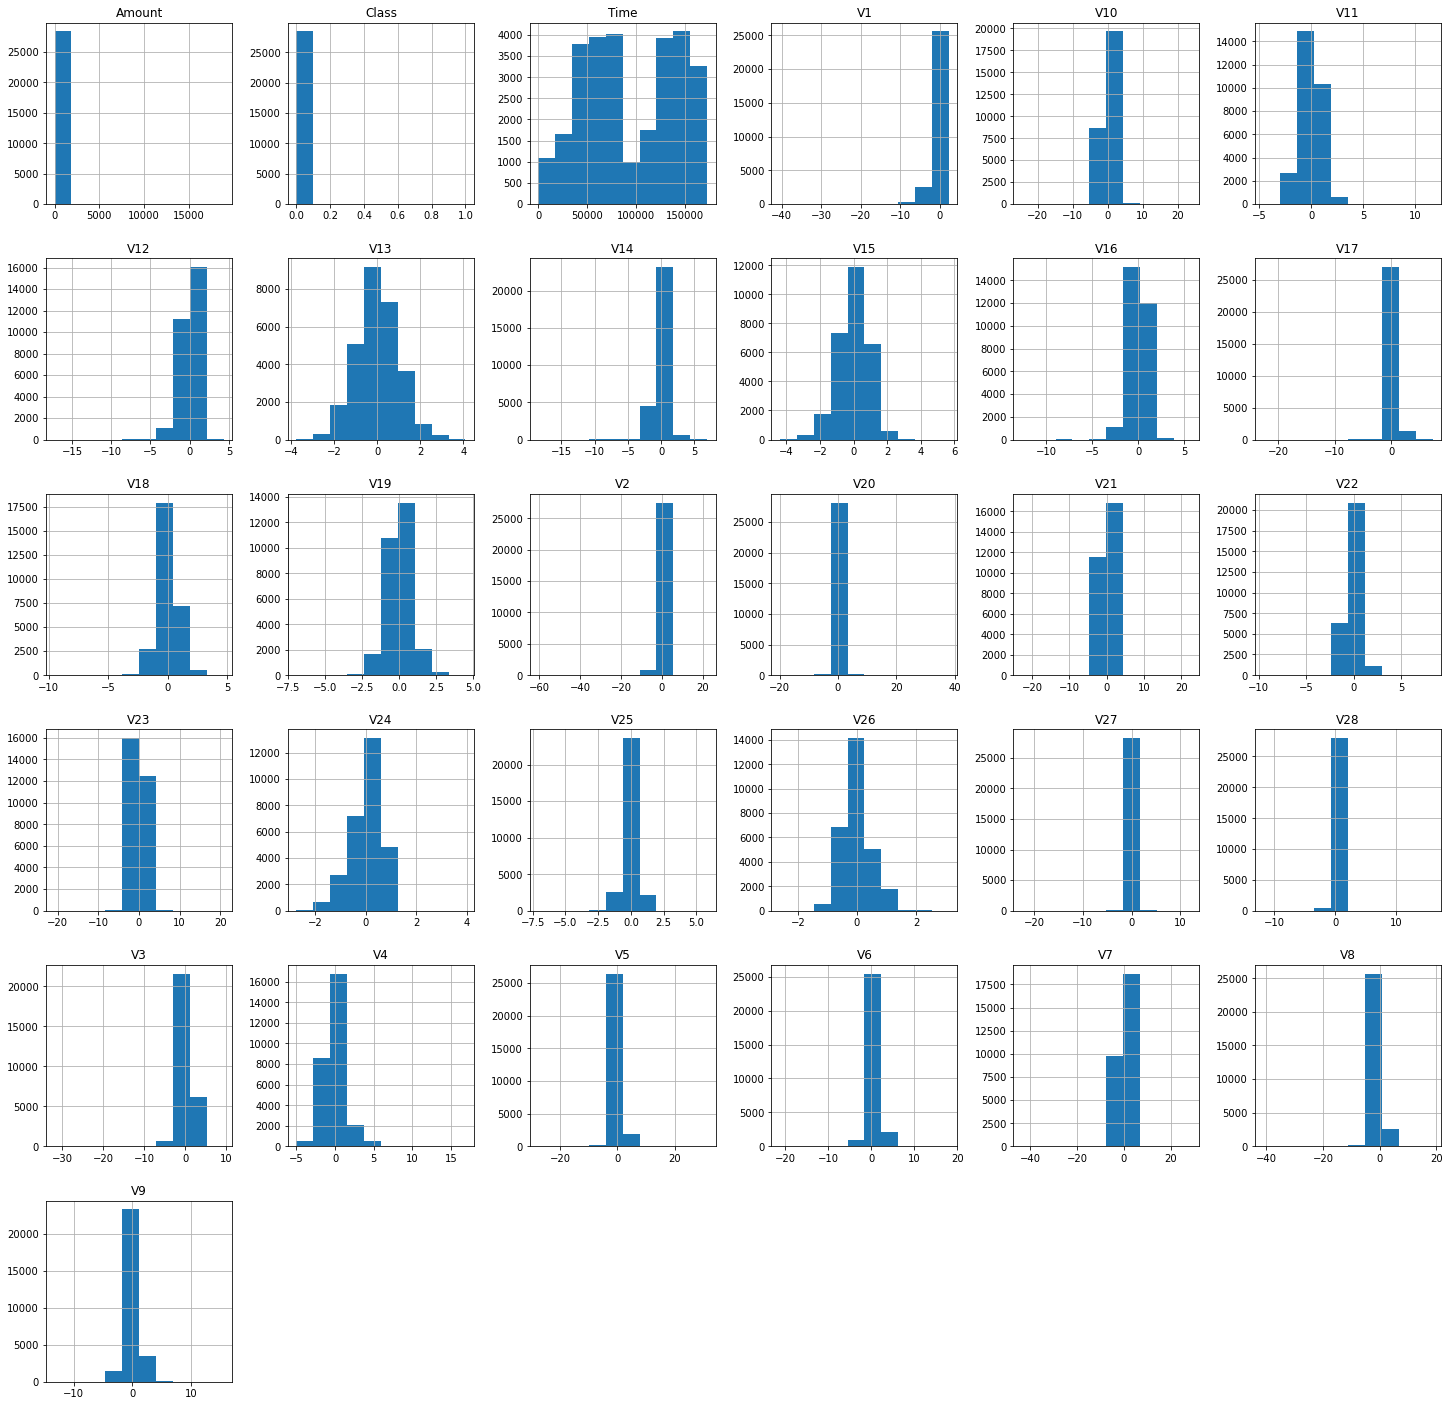

In [14]:
# Plot histogram
df.hist(figsize=(25,25));

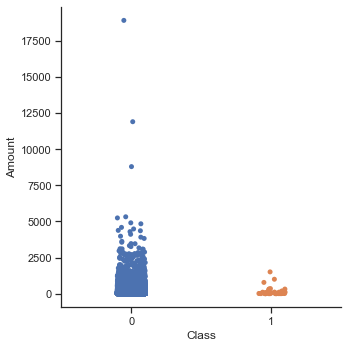

In [15]:
# Plot Amount transactions of fraudulent and normal data
sns.set(style="ticks")
sns.catplot(x="Class",y = "Amount", data=df);

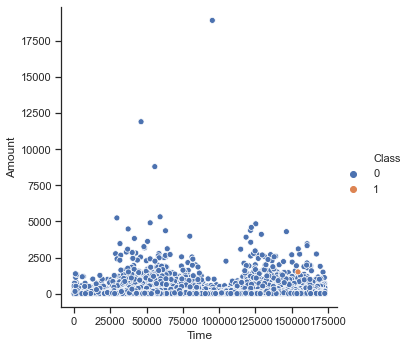

In [16]:
# Explore relations between important columns
sns.relplot(x="Time",y = "Amount", hue = "Class", data=df);

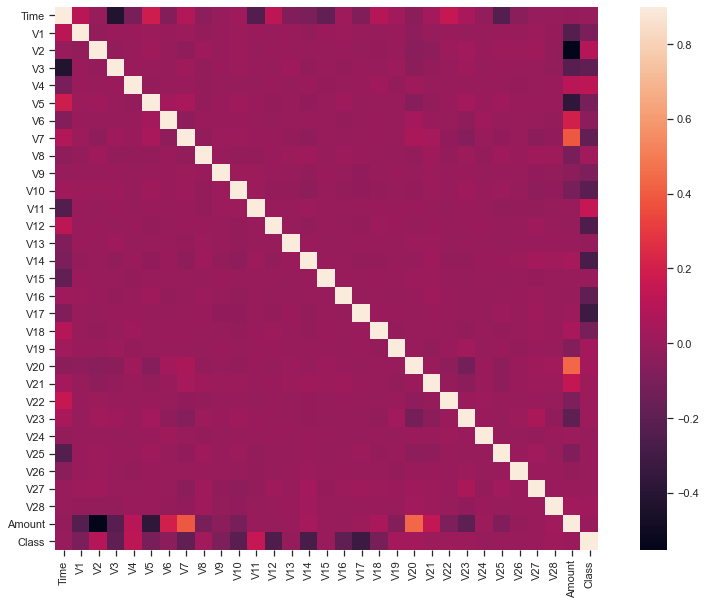

In [17]:
# Correlation Matrix
# We don't need to pull out any of columns
corr = df.corr()
fig = plt.figure(figsize = (15, 10))
sns.heatmap(corr,vmax = 0.9, square = True);

### Split data into X and y

In [18]:
# import package from sklearn
from sklearn.model_selection import train_test_split

# Let's assign all columns to X except the dependent variable.
X = df.drop("Class",axis=1)

# Assign the dependent variable to y
y = df["Class"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### ANN  Model 

In [20]:
# Importing MLPC classifier from sklearn library
from sklearn.neural_network import MLPClassifier

# Running the ANN with tuned parameters.
mlpc_model = MLPClassifier(solver = "adam",activation = "logistic", hidden_layer_sizes = (100,100,100))

In [21]:
# fit the model
mlpc_model.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100))

In [22]:
# Check coefficients
mlpc_model.coefs_

[array([[ 0.42590299,  0.38786818,  0.1803396 , ...,  0.3207778 ,
          0.46908976,  0.14410496],
        [-0.03688003, -0.05870321,  0.00224873, ..., -0.18787641,
          0.04966187,  0.24587657],
        [-0.22875996, -0.19144322,  0.01531617, ..., -0.28817754,
         -0.04493151,  0.01934459],
        ...,
        [ 0.0409052 , -0.00671782,  0.01598091, ..., -0.06490098,
          0.00804784, -0.04756037],
        [ 0.25150987,  0.14588419, -0.39457735, ...,  0.41478239,
         -0.33391702, -0.18029296],
        [-0.16126933,  0.17346202, -0.2602145 , ...,  0.0654873 ,
          0.05802551, -0.18435976]]),
 array([[ 0.17942836,  0.1028835 , -0.14891993, ...,  0.16341384,
          0.19456472,  0.12050698],
        [ 0.15428803,  0.09177   , -0.16229841, ...,  0.09665023,
          0.14320907,  0.02385508],
        [ 0.08273196,  0.0880996 , -0.01830601, ..., -0.00280347,
         -0.00349613,  0.09339022],
        ...,
        [ 0.08529794,  0.10108236, -0.20180698, ...,  

In [23]:
# predict
y_pred = mlpc_model.predict(X_test)

### Evaluation

In [29]:
# Import classification evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,f1_score,precision_score,matthews_corrcoef,recall_score

In [26]:
# metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8534
           1       0.91      0.91      0.91        11

    accuracy                           1.00      8545
   macro avg       0.95      0.95      0.95      8545
weighted avg       1.00      1.00      1.00      8545



In [27]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[8533,    1],
       [   1,   10]], dtype=int64)

In [28]:
# precision score
precision_score(y_test,y_pred)

0.9090909090909091

In [30]:
# recall score
recall_score(y_test,y_pred)

0.9090909090909091

In [31]:
# F1 score
f1_score(y_test,y_pred)

0.9090909090909091

In [32]:
# Matthews correlation coefficient 
matthews_corrcoef(y_test,y_pred)

0.9089737307454673

In [33]:
# Accuracy score
accuracy_score(y_test,y_pred)

0.9997659449970743